## IMPORTING REQUIRED LIBS AND
# READING DATA

In [69]:
import numpy as np
import gzip
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models


train_images = r"E:\OCR\dataset\train\train-images-idx3-ubyte.gz"
train_label = r"E:\OCR\dataset\train\train-labels-idx1-ubyte.gz"
test_images = r"E:\OCR\dataset\test\t10k-images-idx3-ubyte.gz"
test_label = r"E:\OCR\dataset\test\t10k-labels-idx1-ubyte.gz"

def read_mnist(image, labels):
    with gzip.open(labels, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(image,'rb') as imagesFile:
        length = len(labels)
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

## Normalize pixel values to be between 0 and 1

In [70]:
train_data, train_labels = read_mnist(train_images, train_label)
test_data, test_labels = read_mnist(test_images, test_label)

In [71]:

train_images = train_data.astype('float32') / 255.0
test_images = test_data.astype('float32') / 255.0


# train test split


In [72]:
train_images, val_images, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# creating a sequential model

In [73]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [75]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(val_images, val_labels))


Epoch 1/5
750/750 [==============================] - 23s 26ms/step - loss: 0.9172 - accuracy: 0.9066 - val_loss: 0.1568 - val_accuracy: 0.9581
Epoch 2/5
750/750 [==============================] - 20s 26ms/step - loss: 0.1107 - accuracy: 0.9692 - val_loss: 0.1194 - val_accuracy: 0.9694
Epoch 3/5
750/750 [==============================] - 22s 29ms/step - loss: 0.0665 - accuracy: 0.9803 - val_loss: 0.1106 - val_accuracy: 0.9702
Epoch 4/5
750/750 [==============================] - 20s 26ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0869 - val_accuracy: 0.9779
Epoch 5/5
750/750 [==============================] - 19s 26ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.1324 - val_accuracy: 0.9667


In [77]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 3s 8ms/step - loss: 0.1306 - accuracy: 0.9695
Test Accuracy: 96.95%


# VISUALISING TRAINING AND VALIDATION ACCURACY

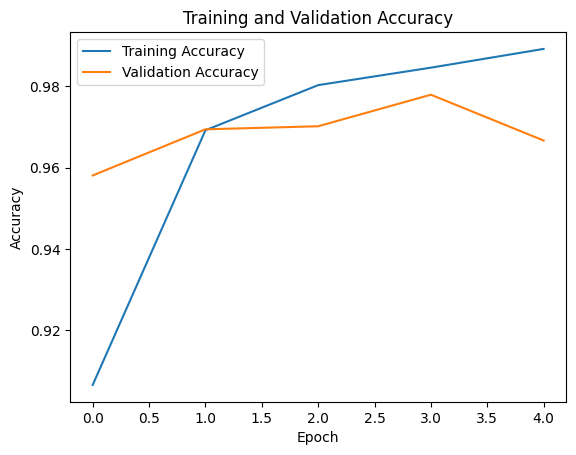

In [78]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()